In [1]:
using XPP
using DataFrames
using Interact, Reactive
using PyPlot

# The Model

We assume that the phosphorylation-state of a substrate $pS$ is regulated as follows:

- $k_{pind}$ Phosphorylation by an constitutively active kinase
- $k_{gwl}$ Phosphorylation by Greatwall kinase, affected by Greatwall depletion
- $k_{ind}$ Dephosphorylation by a consititutively active phosphatase
- $k_{b55}$ Dephosphorylation by PP2A:B55, affected by Greatwall and B55 depletion

$$pS' = k_{pind} + k_{gwl} \cdot Gwl - (k_{ind} + k_{b55} \cdot B55) * pS $$


In [16]:
# Differential equation
odes = Dict("pS" => "k_pind + k_gwl * Gwl - (k_ind + k_b55 * B55)*pS");
# Initial condition
init = Dict("pS" => 0.0);
#Parameters - Just initialised, will be set interactively
pars = Dict(
    "k_pind" => 0.0,
    "k_gwl" => 0.0,
    "k_ind" => 0.0,
    "k_b55" => 0.0,
    "Gwl" => 0.0,
    "B55" => 0.0,
);
M = Model(odes, init, pars, name = "Phosphorylation-Model");

Vectorisation of model
ASCIIString["p[4] + p[5] * p[2] - (p[3] + p[6] * p[1])*y[1]"]
Any[]


# Capturing the depletion conditions

In order to represent the 

In [32]:
function simulateConditions(M, t, Gwl, Gwl_depletion, B55, B55_depletion)
    # Simulate Control
    simulate!(M, "Control", 0:0.01:t)
    # Simulate B55-Depletion
    M.pars["B55"] = B55 * B55_depletion
    simulate!(M, "B55", 0:0.01:t)
    # Simulate Gwl-Depletion
    M.pars["Gwl"] = Gwl * Gwl_depletion
    simulate!(M, "Gwl", 0:0.01:t)
end

function plotSimulations(M, ti, normalise_by_ctrl)
    sp = subplot(111)
    t_c = M.sims["Control"].D["t"]
    ctrl = M.sims["Control"].D["pS"]
    t_b = M.sims["B55"].D["t"]
    b55 = M.sims["B55"].D["pS"]
    t_g = M.sims["Gwl"].D["t"]
    gwl = M.sims["Gwl"].D["pS"]
    
    if normalise_by_ctrl
        ctrl = ctrl./ctrl[end]
        b55 = b55./ctrl[end]
        gwl = gwl./ctrl[end]
    end    
    
    sp[:plot](t_c,ctrl, color = "#5fbdff", linewidth = 2)
    sp[:plot](t_b,b55, color = "#ffc900", linewidth = 2)
    sp[:plot](t_g,gwl, color = "#5fbd00", linewidth = 2)
    sp[:set_xlabel]("time (min)")
    sp[:set_ylabel]("pS")
    title(ti)
end

plotSimulations (generic function with 3 methods)

Interact.Textbox{AbstractString}(Signal{AbstractString}(Analysis of Phosphorylation, nactions=0),"title",nothing,"Analysis of Phosphorylation")

Interact.Textbox{Float64}(Signal{Float64}(1.0, nactions=0),"Gwl",nothing,1.0)

Interact.Textbox{Float64}(Signal{Float64}(0.7303, nactions=0),"B55",nothing,0.7303)

Interact.Textbox{Float64}(Signal{Float64}(0.1, nactions=0),"Gwl_depletion",nothing,0.1)

Interact.Textbox{Float64}(Signal{Float64}(0.3099, nactions=0),"B55_depletion",nothing,0.3099)

Interact.Textbox{Int64}(Signal{Int64}(45, nactions=0),"t",nothing,45)

Interact.Checkbox(Signal{Bool}(true, nactions=0),"normalise_by_ctrl",true)

Interact.Slider{Float64}(Signal{Float64}(0.12, nactions=0),"k_pind",0.12,0.0:0.01:0.25,true)

Interact.Slider{Float64}(Signal{Float64}(0.12, nactions=0),"k_gwl",0.12,0.0:0.01:0.25,true)

Interact.Slider{Float64}(Signal{Float64}(0.12, nactions=0),"k_ind",0.12,0.0:0.01:0.25,true)

Interact.Slider{Float64}(Signal{Float64}(0.12, nactions=0),"k_b55",0.12,0.0:0.01:0.25,true)

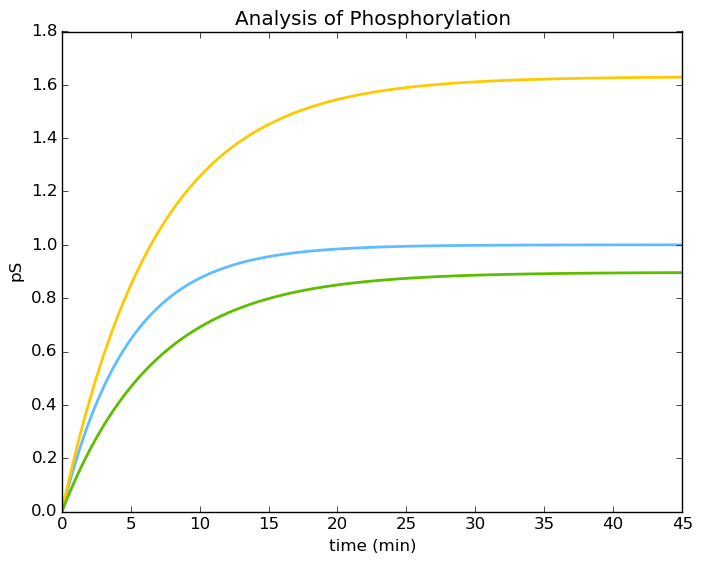

In [33]:
f = figure()
@manipulate for 
    title="Analysis of Phosphorylation",
    Gwl=1.0,
    B55=0.7303,
    Gwl_depletion=0.1,
    B55_depletion=0.3099,
    t=45,
    normalise_by_ctrl=true,
    k_pind=0:0.01:0.25,
    k_gwl=0:0.01:0.25,
    k_ind=0:0.01:0.25,
    k_b55=0:0.01:0.25;
    withfig(f) do
        # Update the parameters
        M.pars= Dict(
            "k_pind" => k_pind,
            "k_ind" => k_ind,
            "k_gwl" => k_gwl,
            "k_b55" => k_b55,
            "Gwl" => Gwl,
            "B55" => B55
        )
        simulateConditions(M, t, Gwl, Gwl_depletion, B55, B55_depletion)
        plotSimulations(M, title, normalise_by_ctrl)

    end
end